# Import libraries

In [1]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
import matplotlib.pyplot as plt



## Path to extracted mfccs

In [28]:
DATA_PATH = "/Users/rr/Desktop/Capstone_Project/Notebooks/data_40.json"

# Create helper functions 

In [16]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [17]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2, figsize=(20,8))

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [18]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

* RNNs can use their internal state (memory) to process sequences of inputs. 
* In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other.
* Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. 
* In an LSTM network, three gates are present:


    * input gate - Input gate — discover which value from input should be used to modify the memory.
    * forget gate — discover what details to be discarded from the block. It is decided by the sigmoid function. 
    * output gate — the input and the memory of the block is used to decide the output.


* num_units is the dimensionality of the output space. num_units is the number of hidden units whose activations get sent forward to the next time step.

* CNN - It is suitable for spatial data such as images.
* RNN - Is suitable for temporal data, also called sequential data.

CNNs employ filters within convolutional layers to transform data. Whereas, RNNs reuse activation functions from other data points in the sequence to generate the next output in a series.



In [19]:
def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [29]:
# get train, validation, test splits

X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

In [30]:
X_train.shape 

(2501, 65, 40)

In [31]:
# create network

input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
model = build_model(input_shape)

In [32]:
# compile model

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 65, 64)            26880     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 64,714
Trainable params: 64,714
Non-trainable params: 0
_________________________________________________________________


In [34]:
# train model

history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)


Epoch 1/100


2022-02-06 13:33:36.945553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 13:33:37.148709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 13:33:37.248648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 13:33:37.367272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 13:33:37.545644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - ETA: 0s - loss: 1.9984 - accuracy: 0.4838

2022-02-06 13:33:41.452873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 13:33:41.530964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-06 13:33:41.619420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 6s 57ms/step - loss: 1.9984 - accuracy: 0.4838 - val_loss: 1.6921 - val_accuracy: 0.7332
Epoch 2/100
79/79 [==============================] - 3s 44ms/step - loss: 1.2081 - accuracy: 0.6969 - val_loss: 0.6880 - val_accuracy: 0.7220
Epoch 3/100
79/79 [==============================] - 3s 43ms/step - loss: 0.6493 - accuracy: 0.7153 - val_loss: 0.4772 - val_accuracy: 0.8339
Epoch 4/100
79/79 [==============================] - 3s 43ms/step - loss: 0.5206 - accuracy: 0.7841 - val_loss: 0.3897 - val_accuracy: 0.8466
Epoch 5/100
79/79 [==============================] - 3s 43ms/step - loss: 0.4508 - accuracy: 0.8117 - val_loss: 0.3494 - val_accuracy: 0.8498
Epoch 6/100
79/79 [==============================] - 3s 43ms/step - loss: 0.4021 - accuracy: 0.8389 - val_loss: 0.3047 - val_accuracy: 0.8818
Epoch 7/100
79/79 [==============================] - 3s 44ms/step - loss: 0.3528 - accuracy: 0.8685 - val_loss: 0.2777 - val_accuracy: 0.8978
Epoch 8/100
79/79 

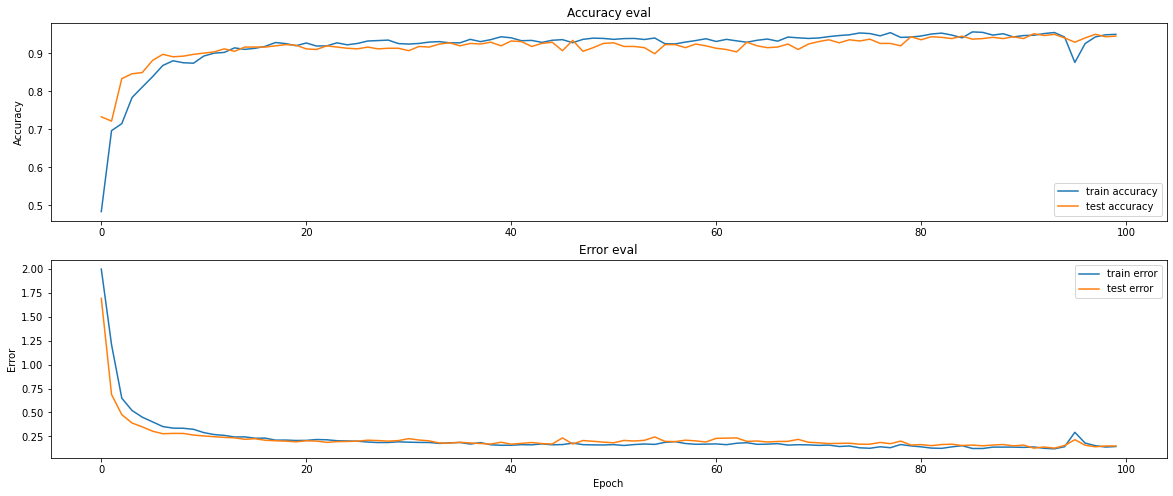

In [35]:
# plot accuracy/error for training and validation

plot_history(history)

In [36]:
# evaluate model on test set

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

33/33 - 1s - loss: 0.1766 - accuracy: 0.9243

Test accuracy: 0.9242569804191589
